## **Anomaly Detection on a Timeseries dataset**

In [52]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('nyc_taxi.csv') 
df.tail()

,timestamp,value
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591
10319,2015-01-31 23:30:00,26288


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [53]:
def overview (df, col=None):
    print(f'Shape of the dataframe:{df.shape}\n')

    print(f'Data types of the columns:\n{df.dtypes}\n')
    print(f'Null values counts:\n{df.isnull().sum()}\n\n')

    if col is not None:
        df[col] = pd.to_datetime(df[col])
        print(f'Range:\nStart: {df[col].min()}')
        print(f'End: {df[col].max()}\n')
        
        total_days = (df[col].max() - df[col].min()).days
        print(f'Total days: {total_days}')



In [54]:
overview(df, 'timestamp')

Shape of the dataframe:(10320, 2)

Data types of the columns:
timestamp    datetime64[ns]
value                 int64
dtype: object

Null values counts:
timestamp    0
value        0
dtype: int64


Range:
Start: 2014-07-01 00:00:00
End: 2015-01-31 23:30:00

Total days: 214


In [7]:
df_hourly = df.set_index('timestamp').resample('H').mean().reset_index()
df_daily = df.set_index('timestamp').resample('D').mean().reset_index()
df_weekly = df.set_index('timestamp').resample('W').mean().reset_index()

print(f'Hourly demand dataframe shape: {df_hourly.shape}')
print(f'Daily demand dataframe shape: {df_daily.shape}')
print(f'Weekly demand dataframe shape: {df_weekly.shape}')

Hourly demand dataframe shape: (5160, 2)
Daily demand dataframe shape: (215, 2)
Weekly demand dataframe shape: (31, 2)


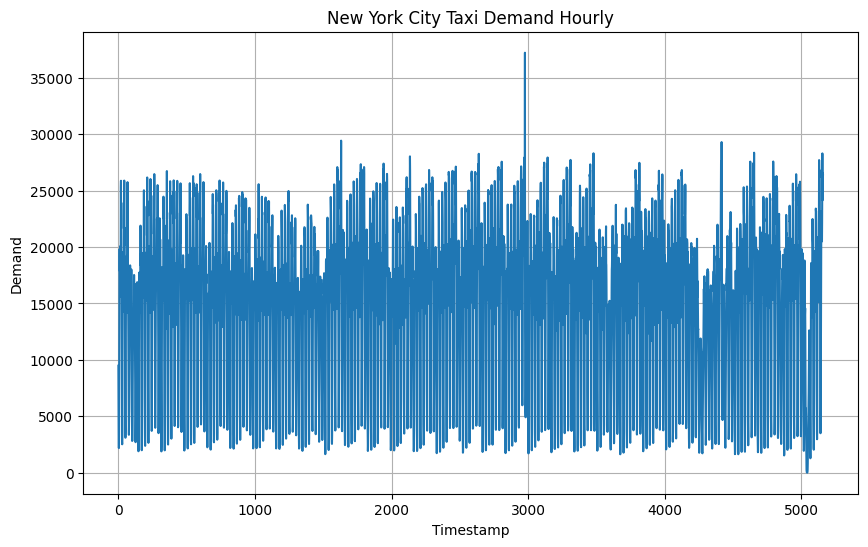

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df_hourly.index, df_hourly['value'], label='Hourly Demand')
plt.title('New York City Taxi Demand Hourly')
plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.grid(True)
plt.show()

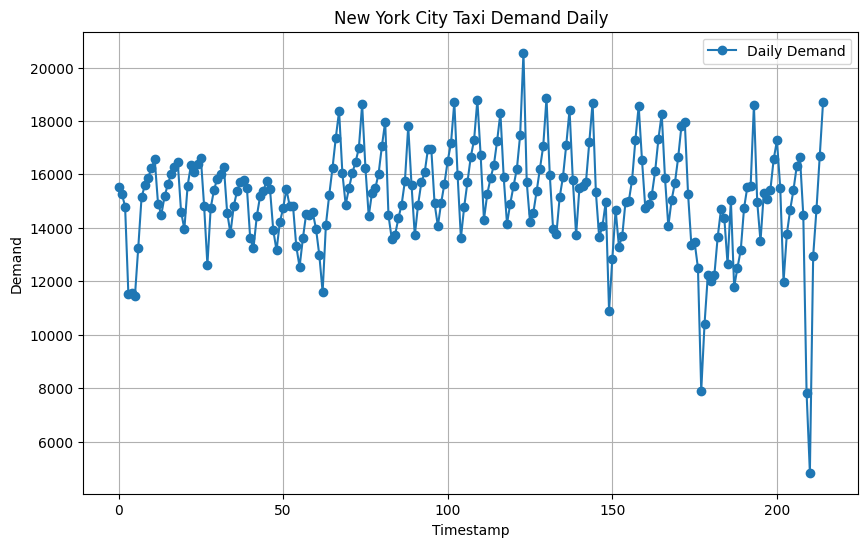

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily.index, df_daily['value'], label='Daily Demand', marker='o')
plt.title('New York City Taxi Demand Daily')
plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()

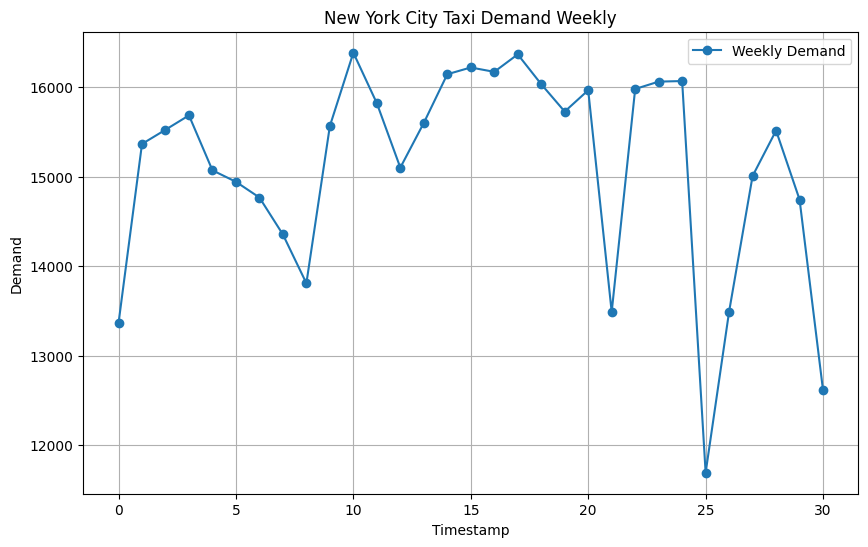

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df_weekly.index, df_weekly['value'], label='Weekly Demand', marker='o')
plt.title('New York City Taxi Demand Weekly')
plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()

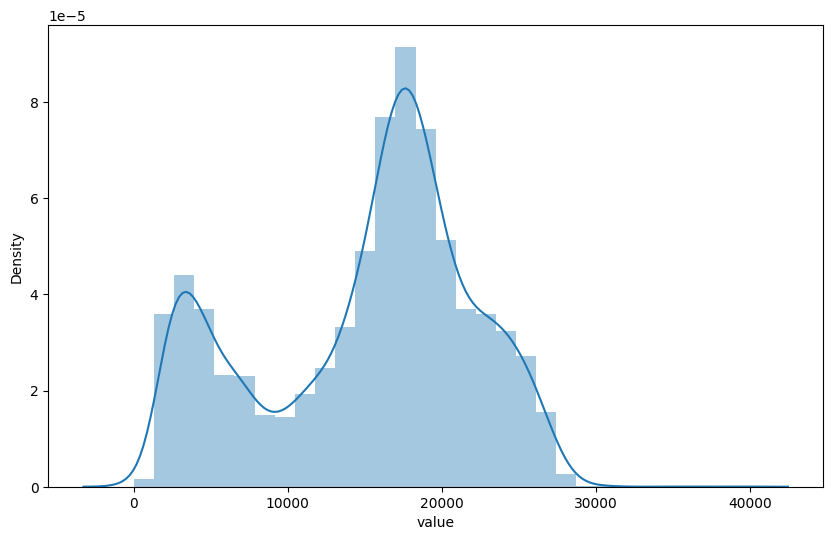

In [11]:
plt.figure(figsize=(10, 6))
sns.distplot(df['value'], bins=30)
plt.show()

In [12]:
for dataframe in [df_daily, df_hourly]:
    dataframe['Weekday']  = (pd.Categorical(dataframe['timestamp'].dt.strftime('%A'),
                                              categories=['Monday', 'Tuesday', 'Wednesday',
                                                          'Thursday', 'Friday',
                                                          'Saturday', 'Sunday']))
    dataframe['Hour'] = dataframe['timestamp'].dt.hour
    dataframe['Day'] = dataframe['timestamp'].dt.weekday
    dataframe['Month'] = dataframe['timestamp'].dt.month
    dataframe['Year'] = dataframe['timestamp'].dt.year
    dataframe['Month_day'] = dataframe['timestamp'].dt.day
    dataframe['Lag'] = dataframe['value'].shift(1)
    dataframe['Rolling_mean'] = dataframe['value'].rolling(7, min_periods=1).mean()

In [13]:
df_daily.head(10)

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_mean
0,2014-07-01,15540.979167,Tuesday,0,1,7,2014,1,NaN,15540.979167
1,2014-07-02,15284.166667,Wednesday,0,2,7,2014,2,15540.979167,15412.572917
2,2014-07-03,14794.625000,Thursday,0,3,7,2014,3,15284.166667,15206.590278
3,2014-07-04,11511.770833,Friday,0,4,7,2014,4,14794.625000,14282.885417
4,2014-07-05,11572.291667,Saturday,0,5,7,2014,5,11511.770833,13740.766667
5,2014-07-06,11464.270833,Sunday,0,6,7,2014,6,11572.291667,13361.350694
6,2014-07-07,13261.875000,Monday,0,0,7,2014,7,11464.270833,13347.139881
7,2014-07-08,15136.145833,Tuesday,0,1,7,2014,8,13261.875000,13289.306548
8,2014-07-09,15595.145833,Wednesday,0,2,7,2014,9,15136.145833,13333.732143
9,2014-07-10,15866.583333,Thursday,0,3,7,2014,10,15595.145833,13486.869048


In [14]:
df_hourly.tail(10)

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_mean
5150,2015-01-31 14:00:00,21691.0,Saturday,14,5,1,2015,31,23183.5,19205.071429
5151,2015-01-31 15:00:00,22283.5,Saturday,15,5,1,2015,31,21691.0,20941.142857
5152,2015-01-31 16:00:00,20494.0,Saturday,16,5,1,2015,31,22283.5,21605.571429
5153,2015-01-31 17:00:00,22155.0,Saturday,17,5,1,2015,31,20494.0,22077.642857
5154,2015-01-31 18:00:00,26665.0,Saturday,18,5,1,2015,31,22155.0,22805.857143
5155,2015-01-31 19:00:00,28288.5,Saturday,19,5,1,2015,31,26665.0,23537.214286
5156,2015-01-31 20:00:00,24138.0,Saturday,20,5,1,2015,31,28288.5,23673.571429
5157,2015-01-31 21:00:00,24194.5,Saturday,21,5,1,2015,31,24138.0,24031.214286
5158,2015-01-31 22:00:00,26515.0,Saturday,22,5,1,2015,31,24194.5,24635.714286
5159,2015-01-31 23:00:00,26439.5,Saturday,23,5,1,2015,31,26515.0,25485.071429


In [38]:
by_weekday = df_hourly[['value', 'Hour', 'Weekday']].groupby(['Hour', 'Weekday']).mean()['value'].unstack()
by_weekday.reset_index(inplace=True)
by_weekday.tail()

Weekday,Hour,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
19,19,21255.900000,23166.032258,24014.258065,23768.419355,24886.129032,24501.870968,18454.133333
20,20,19880.766667,22035.870968,23014.112903,23213.177419,23687.306452,22193.758065,16797.733333
21,21,19197.350000,22310.741935,23345.806452,23603.564516,23609.838710,21983.241935,16036.950000
22,22,17191.700000,20481.516129,22255.290323,22958.967742,24589.000000,23949.951613,14499.900000
23,23,12863.000000,16217.370968,18186.274194,20732.241935,24668.693548,25192.516129,11686.450000


In [21]:
by_weekday.shape

(24, 8)

In [22]:
fig = px.line(by_weekday, x=by_weekday.index, y=by_weekday.columns[1:8],
              labels={'value': 'Demand', 'index': 'Hour of Day'},
              title='New York City Taxi Demand by Day & Hour',
              width=800, height=500)

fig.update_layout(hovermode='x', showlegend=True)
fig.update_xaxes(title_text='Hour of Day', showgrid=True)
fig.update_yaxes(title_text='Demand', showgrid=True)

fig.show()

In [29]:
by_day = df_hourly[['value', 'Weekday']].groupby(['Weekday']).mean()
by_day

,value
Weekday,
Monday,13362.086111
Tuesday,14308.778898
Wednesday,15137.875672
Thursday,15343.679435
Friday,15983.970430
Saturday,17007.264785
Sunday,14749.539583


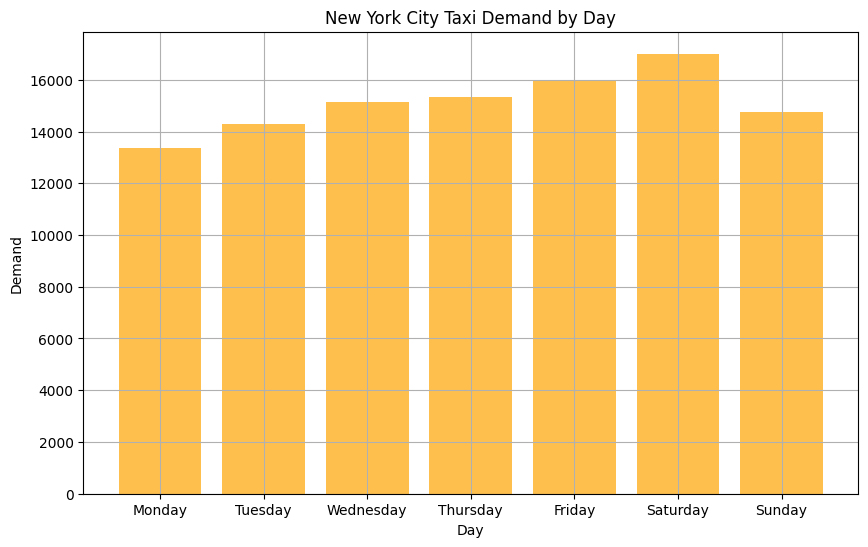

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(by_day.index, by_day['value'], color='orange', alpha =0.7)

plt.xlabel('Day')
plt.ylabel('Demand')
plt.title('New York City Taxi Demand by Day')
plt.grid(True)

plt.show()


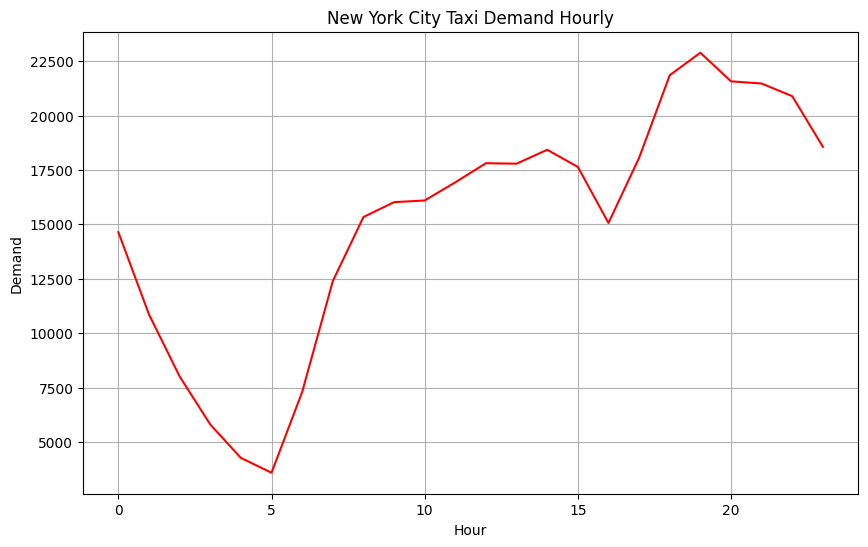

In [39]:
by_hour = df_hourly[['value', 'Hour']].groupby(['Hour']).mean()

plt.figure(figsize=(10, 6))
plt.plot(by_hour, color = 'red')

plt.xlabel('Hour')
plt.ylabel('Demand')
plt.title('New York City Taxi Demand Hourly')
plt.grid(True)

plt.show()

### Anomaly Detection Model: Isolation Forest

In [55]:
 df_hourly.dropna(inplace=True)

df_hourly_model_data = df_hourly[['value', 'Hour', 'Day', 'Month', 
                                 'Month_day', 'Lag', 'Rolling_mean', 'timestamp']].set_index('timestamp')
overview(df_hourly_model_data)

Shape of the dataframe:(5159, 7)

Data types of the columns:
value           float64
Hour              int32
Day               int32
Month             int32
Month_day         int32
Lag             float64
Rolling_mean    float64
dtype: object

Null values counts:
value           0
Hour            0
Day             0
Month           0
Month_day       0
Lag             0
Rolling_mean    0
dtype: int64




In [51]:
df_hourly_model_data.sample(5)

,value,Hour,Day,Month,Month_day,Lag,Rolling_mean
timestamp,,,,,,,
2014-12-05 05:00:00,4121.0,5,4,12,5,3768.5,10225.000000
2015-01-04 06:00:00,2834.5,6,6,1,4,2787.0,9339.357143
2014-11-11 07:00:00,14366.0,7,1,11,11,7543.0,5451.928571
2015-01-11 04:00:00,7823.0,4,6,1,11,13495.5,20311.857143
2014-12-14 14:00:00,20704.0,14,6,12,14,21485.0,17678.928571


In [116]:
def run_isolation_forest(data, contamination=0.005, n_estimators=100, max_samples=0.7):

    IF = IsolationForest(contamination=0.005,
                         n_estimators=100,
                         max_samples=0.7,
                         random_state=42)
    
    IF.fit(data)

    # In IsolationForest, predict method assigns the label -1 to anomalies (outliers) and 1 to normal points.
    outliers = pd.Series(IF.predict(data)).apply(lambda x: 1 if x==-1 else 0)
    score = IF.decision_function(data)

    return outliers, score



In [117]:
outliers, score = run_isolation_forest(df_hourly_model_data)

In [118]:
df_hourly['Outliers'] = outliers
df_hourly['Anomaly_Score'] = score

In [119]:
overview(df_hourly['Outliers'])

Shape of the dataframe:(5159,)

Data types of the columns:
float64

Null values counts:
1




In [120]:
df_hourly['Outliers'].value_counts()

Outliers
0.0    5132
1.0      26
Name: count, dtype: int64

In [131]:
outliers_df = df_hourly[df_hourly['Outliers'] == 1]
outliers_df.sample(5)

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_mean,Outliers,Anomaly_Score
5046,2015-01-27 06:00:00,88.0,Tuesday,6,1,1,2015,27,29.0,43.428571,1.0,-0.010250
2976,2014-11-02 00:00:00,24109.5,Sunday,0,6,11,2014,2,26002.0,25969.000000,1.0,0.032586
5040,2015-01-27 00:00:00,94.5,Tuesday,0,1,1,2015,27,243.0,2638.357143,1.0,-0.021476
5034,2015-01-26 18:00:00,5703.5,Monday,18,0,1,2015,26,5221.0,9598.428571,1.0,0.002575
5135,2015-01-30 23:00:00,26464.0,Friday,23,4,1,2015,30,26806.5,25444.142857,1.0,-0.001953


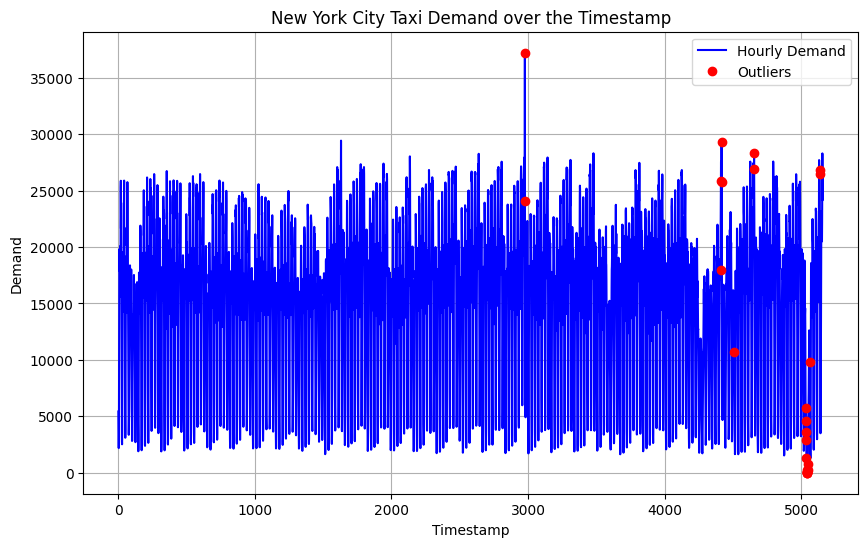

In [133]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_hourly.index, df_hourly['value'], label='Hourly Demand', color='blue')

outlier_indices = df_hourly[df_hourly['Outliers'] == 1].index
ax.plot(outlier_indices, df_hourly.loc[outlier_indices, 'value'], 'ro', label='Outliers')

ax.set_title('New York City Taxi Demand over the Timestamp')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Demand')
ax.legend()
plt.grid(True)
plt.show()


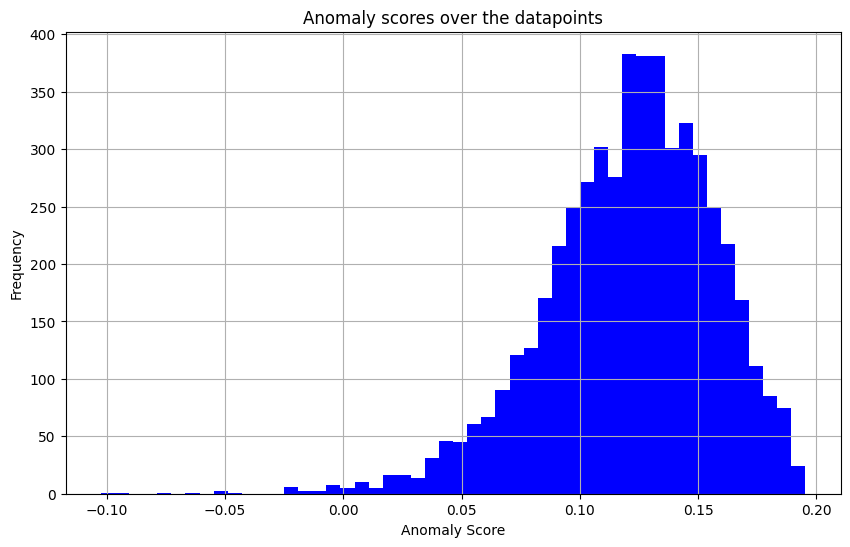

In [137]:
plt.figure(figsize=(10, 6))
plt.hist(df_hourly['Anomaly_Score'], color = 'blue', bins=50)

plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly scores over the datapoints')
plt.grid(True)

plt.show()

In [148]:
def outliers(threshold):
    print(f'Number of Outliers below Anomaly Score Threshold {threshold}:', end=' ')
    print(len(df_hourly.query(f'Outliers == 1 & Anomaly_Score <= {threshold}')))

In [150]:
outliers(0.02)

Number of Outliers below Anomaly Score Threshold 0.02: 20
